In [1]:
# this is for Airbnb boston data analysis and this work would be one of the outcome of the Udicity data scientist nanodegree project 

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.lib.histograms import histogram
from numpy import size
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
listingsBostonDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/listingsBoston.csv')
calendarBostonDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/calendarBoston.csv')
reviewsBostonDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/reviewsBoston.csv')
listingsSeattleDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/listingsSeattle.csv')
calendarSeattleDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/calendarSeattle.csv')
reviewsSeattleDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/reviewsSeattle.csv')

# Getting to know the datasets

In [3]:
print("Shape of listings Boston:", listingsBostonDf.shape)
print("Shape of listings Seattle", listingsSeattleDf.shape)
print("Shape of calendar Boston", calendarBostonDf.shape)
print("Shape of calendar Seattle", calendarSeattleDf.shape)
print("Shape of reviews Boston", reviewsBostonDf.shape)
print("Shape of reviews Seattle", reviewsSeattleDf.shape)


Shape of listings Boston: (3585, 95)
Shape of listings Seattle (3818, 92)
Shape of calendar Boston (1308890, 4)
Shape of calendar Seattle (1393570, 4)
Shape of reviews Boston (68275, 6)
Shape of reviews Seattle (84849, 6)


Join the datasets

In [4]:
listingsBostonDf["city_joined"] = "Boston"
listingsSeattleDf["city_joined"] = "Seattle"

listingsDf = pd.concat([listingsBostonDf, listingsSeattleDf], axis=0)

calendarBostonDf["city_joined"] = "Boston"
calendarSeattleDf["city_joined"] = "Seattle"

calendarDf = pd.concat([calendarBostonDf, calendarSeattleDf], axis=0)

reviewsBostonDf["city_joined"] = "Boston"
reviewsSeattleDf["city_joined"] = "Seattle"

reviewsDf = pd.concat([reviewsBostonDf, reviewsSeattleDf], axis=0)


In [5]:
listingsDf['city_joined'].value_counts()

Seattle    3818
Boston     3585
Name: city_joined, dtype: int64

In [6]:
#New datasets
print("Shape of listings:", listingsDf.shape)
print("Shape of calendar", calendarDf.shape)
print("Shape of reviews", reviewsDf.shape)

Shape of listings: (7403, 96)
Shape of calendar (2702460, 5)
Shape of reviews (153124, 7)


Looking at null values

In [7]:
#Finding out if there are rows which contain only null values
print("Columns in 'listingsDf'with only missing values:", set(listingsDf.columns[listingsDf.isnull().mean() == 1]))
print("Columns in 'calendarDf'with only missing values:", set(calendarDf.columns[calendarDf.isnull().mean() == 1]))
print("Columns in 'reviewsDf'with only missing values:", set(reviewsDf.columns[reviewsDf.isnull().mean() == 1]))

Columns in 'listingsDf'with only missing values: {'license'}
Columns in 'calendarDf'with only missing values: set()
Columns in 'reviewsDf'with only missing values: set()


In [8]:
#Dropping value with only null values
listingsDf = listingsDf.drop(['license'], axis=1)

In [9]:
#Check the percentage of missing values by columns in the dataset
print('Listings:\n', listingsDf.isnull().sum().sort_values(ascending=False)[:10] / listingsDf.shape[0])
print('\nCalendar: \n', calendarDf.isnull().sum().sort_values(ascending=False)[:5] / calendarDf.shape[0])
print('\nReview: \n', reviewsDf.isnull().sum().sort_values(ascending=False)[:10] / reviewsDf.shape[0])

Listings:
 square_feet                     0.979333
interaction                     0.725652
access                          0.716872
house_rules                     0.676753
monthly_price                   0.675132
weekly_price                    0.608132
security_deposit                0.566662
jurisdiction_names              0.484263
neighbourhood_group_cleansed    0.484263
has_availability                0.484263
dtype: float64

Calendar: 
 price          0.416243
listing_id     0.000000
date           0.000000
available      0.000000
city_joined    0.000000
dtype: float64

Review: 
 comments         0.000464
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
city_joined      0.000000
dtype: float64


In [10]:
#describe
listingsDf.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,7.403000e+03,7.403000e+03,7.403000e+03,7401.000000,7401.000000,7403.000000,7403.000000,7403.000000,7373.000000,7387.000000,...,7403.000000,5943.000000,5922.000000,5932.000000,5925.000000,5934.000000,5926.000000,5926.000000,7403.000000,6020.000000
mean,6.950001e+06,2.016049e+13,2.021053e+07,32.222537,32.222537,45.067727,-97.515448,3.200189,1.241150,1.282659,...,20.684047,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777,7.686073,2.028161
std,4.052397e+06,4.009296e+08,1.962309e+07,123.585161,123.585161,2.643568,25.613198,1.890166,0.549408,0.823251,...,36.733024,8.207451,0.821783,0.999271,0.682247,0.656589,0.775312,0.892824,21.465871,1.968696
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,0.000000,42.235942,-122.417219,1.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,3.864100e+06,2.016010e+13,4.343164e+06,1.000000,1.000000,42.345668,-122.330837,2.000000,1.000000,1.000000,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.590000
50%,7.035240e+06,2.016010e+13,1.448650e+07,1.000000,1.000000,47.542907,-122.276419,2.000000,1.000000,1.000000,...,7.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.370000
75%,9.500804e+06,2.016091e+13,3.028359e+07,4.000000,4.000000,47.624460,-71.079518,4.000000,1.000000,2.000000,...,23.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.890000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,47.733358,-71.000100,16.000000,8.000000,7.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


It is noticed that price variables are treated as strings as they begin with a '$'. They need to be converted into floats

In [11]:
listingsDf['price'] = listingsDf['price'].str.replace('$', '').str.replace(',', '')
listingsDf['price'] = listingsDf['price'].astype(float)

listingsDf['cleaning_fee'] = listingsDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listingsDf['cleaning_fee'] = listingsDf['cleaning_fee'].astype(float)

listingsDf['weekly_price'] = listingsDf['weekly_price'].str.replace('$', '').str.replace(',', '')
listingsDf['weekly_price'] = listingsDf['weekly_price'].astype(float)

listingsDf['monthly_price'] = listingsDf['monthly_price'].str.replace('$', '').str.replace(',', '')
listingsDf['monthly_price'] = listingsDf['monthly_price'].astype(float)

listingsDf['security_deposit'] = listingsDf['security_deposit'].str.replace('$', '').str.replace(',', '')
listingsDf['security_deposit'] = listingsDf['security_deposit'].astype(float)

listingsBostonDf['price'] = listingsBostonDf['price'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['price'] = listingsBostonDf['price'].astype(float)

listingsBostonDf['cleaning_fee'] = listingsBostonDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['cleaning_fee'] = listingsBostonDf['cleaning_fee'].astype(float)

listingsBostonDf['weekly_price'] = listingsBostonDf['weekly_price'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['weekly_price'] = listingsBostonDf['weekly_price'].astype(float)

listingsBostonDf['monthly_price'] = listingsBostonDf['monthly_price'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['monthly_price'] = listingsBostonDf['monthly_price'].astype(float)

listingsBostonDf['security_deposit'] = listingsBostonDf['security_deposit'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['security_deposit'] = listingsBostonDf['security_deposit'].astype(float)

listingsSeattleDf['price'] = listingsSeattleDf['price'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['price'] = listingsSeattleDf['price'].astype(float)

listingsSeattleDf['cleaning_fee'] = listingsSeattleDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['cleaning_fee'] = listingsSeattleDf['cleaning_fee'].astype(float)

listingsSeattleDf['weekly_price'] = listingsSeattleDf['weekly_price'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['weekly_price'] = listingsSeattleDf['weekly_price'].astype(float)

listingsSeattleDf['monthly_price'] = listingsSeattleDf['monthly_price'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['monthly_price'] = listingsSeattleDf['monthly_price'].astype(float)

listingsSeattleDf['security_deposit'] = listingsSeattleDf['security_deposit'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['security_deposit'] = listingsSeattleDf['security_deposit'].astype(float)

<ipython-input-11-4a6575b4791e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsDf['price'] = listingsDf['price'].str.replace('$', '').str.replace(',', '')
<ipython-input-11-4a6575b4791e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsDf['cleaning_fee'] = listingsDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
<ipython-input-11-4a6575b4791e>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsDf['weekly_price'] = listingsDf['weekly_price'].str.replace('$', '').str.replace(',', '')
<ipyth

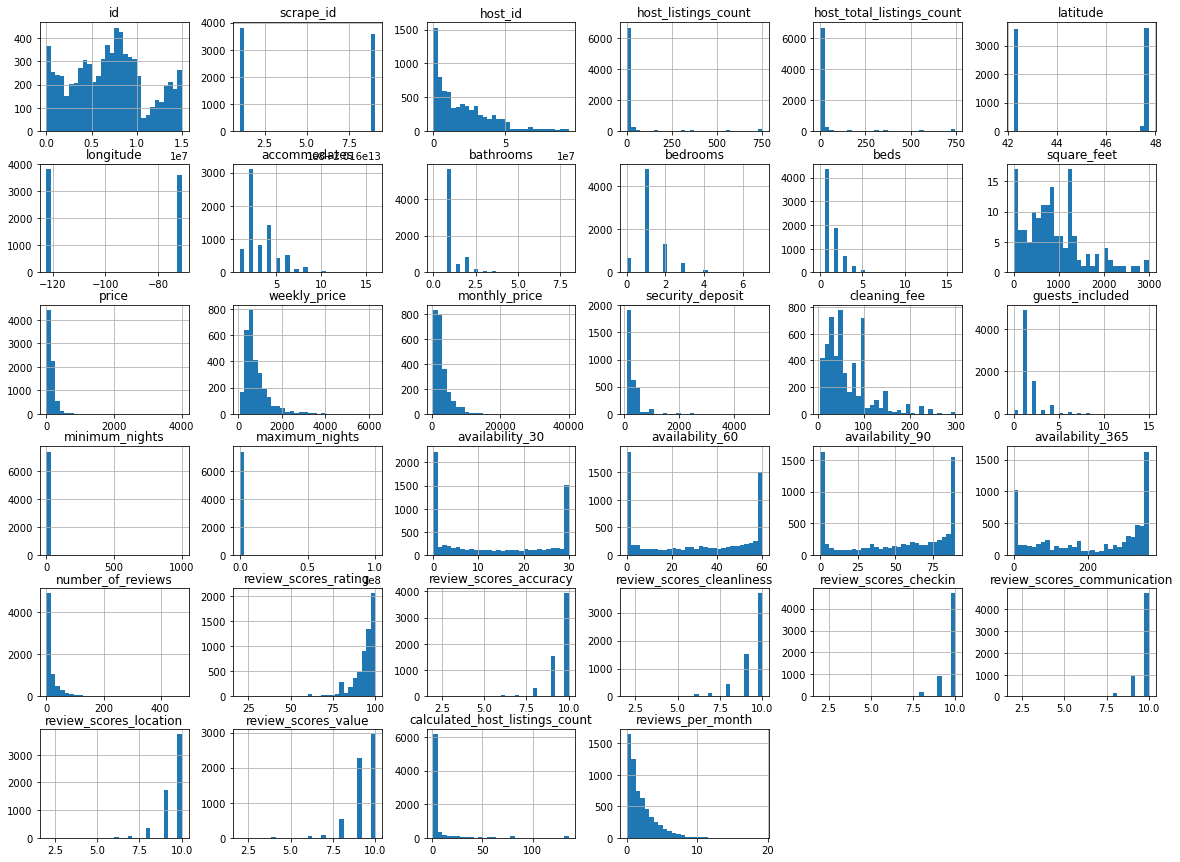

In [12]:
listingsDf.hist(figsize=[20,15], bins=30);

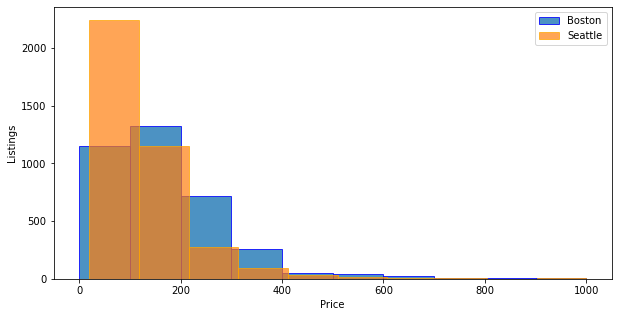

In [13]:
#Visualising Boston and Seatle price range
plt.figure(figsize=(10,5))

boston_price = listingsDf['price'].loc[listingsDf['city_joined'] == 'Boston'].values.tolist()
seattle_price = listingsDf['price'].loc[listingsDf['city_joined'] == 'Seattle'].values.tolist()


plt.hist(boston_price, label='Boston', alpha=.8, edgecolor='blue', bins=10, range=(0,1000))
plt.hist(seattle_price, label='Seattle', alpha=.7, edgecolor='orange', bins=10)
plt.xlabel("Price")
plt.ylabel("Listings")
plt.legend()

plt.show()


# Question 1
Which factors influience the price of houses the most in Boston and Seattle

In [14]:
most_infl = listingsDf.corr()['price'].sort_values(ascending = False).head(10)[1:]

In [15]:
most_infl_b = listingsBostonDf.corr()['price'].sort_values(ascending = False).head(10)[1:]

In [16]:
most_infl_s = listingsSeattleDf.corr()['price'].sort_values(ascending = False).head(10)[1:]

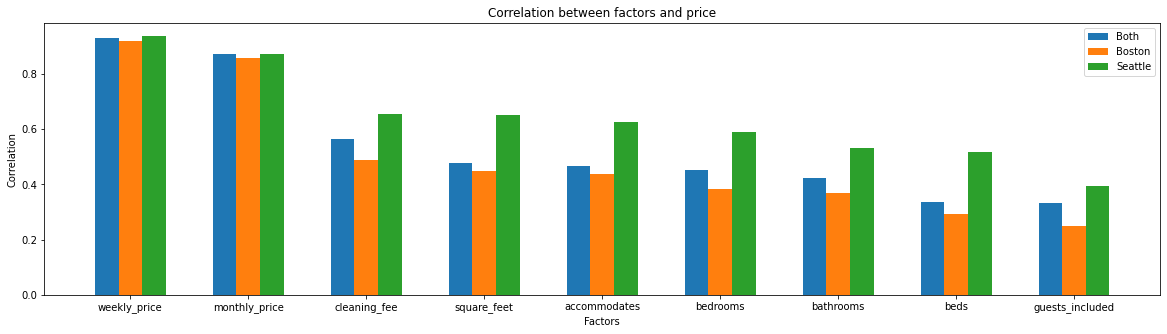

In [17]:
plt.figure(figsize=(20,5))

X = ['weekly_price', 'monthly_price', 'cleaning_fee', 'square_feet', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'guests_included']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, most_infl, 0.2, label = 'Both')
plt.bar(X_axis, most_infl_b, 0.2, label = 'Boston')
plt.bar(X_axis + 0.2, most_infl_s, 0.2, label = 'Seattle')

plt.xticks(X_axis, X)
plt.xlabel("Factors")
plt.ylabel("Correlation")
plt.title("Correlation between factors and price")
plt.legend()
plt.show()

Manipulate the dataset

In [18]:
#adjectives taken from http://adjective1.com/for-dining/ and http://adjective1.com/for-rooms/
adj_lst = ['accessible', 'beautiful', 'best', 'better', 'brilliant', 'charming', 'cheap', 'cheerful', 'clean', 'comfortable', 'comfy',
            'connected', 'cosy', 'cozy', 'deluxe', 'desirable', 'elegant', 'excellent', 'favourite', 'fine', 'good', 'gorgeous', 'intimate',
            'large', 'nice', 'pretty', 'private', 'spacious', 'splendid', 'stylish', 'tidy', 'magnificent', 'delicious', 'decent', 'perfect',
            'positive', 'reasonable', 'tremendous', 'bright', 'modern', 'quiet' , 'multicultural', 'public transportation', 'easy access', 
            'shops', 'restaurants', 'welcoming', 'stores', 'shop', 'store', 'gem', 'cafes', 'transport', 'museum', 'family', 'bars', 'roommate',
            'pet', 'dog', 'cat', 'children', 'child', 'crazy', 'toddler', 'kid', 'parking', 'rail station', 'bus station', 'private bathroom',
            'kitchen', 'wifi', 'home office', 'professional', 'laid-back', 'busy', 'chat', 'large', 'sunny']


In [19]:
listingsDf['combinedString'] = listingsDf['name'].astype(str) + ', ' + listingsDf['summary'].astype(str) + ', ' + listingsDf['space'].astype(str) + ', ' + listingsDf['description'].astype(str) + ', '+ listingsDf['neighborhood_overview'].astype(str) + ', ' + listingsDf['notes'].astype(str) + ', ' + listingsDf['transit'].astype(str) + ', ' + listingsDf['interaction'].astype(str) 

Add key words from descriptive columns

In [20]:
for adj in adj_lst:
    listingsDf[adj] = 0
    for i in range(listingsDf.shape[0]):
        comb_str = listingsDf[['combinedString']].iloc[i]
        #replacing all the symbols in the string and making all the letters with lower case
        comb_str_lc = str(list(map(lambda x: x.lower(), comb_str))).replace(',', '').replace('"', '').replace('.', '').replace(':', '').replace('&', '').replace('-', '').replace('!', '').replace('(', '').replace(')', '')
        if adj in comb_str_lc:
            listingsDf[adj].iloc[i] = 1

c:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Get dummy variables for rest of columns

In [21]:
dummy_col = ['cancellation_policy', 'bed_type', 'room_type', 'property_type', 'host_response_time','neighbourhood_cleansed','bedrooms', 'city_joined']

for col in  dummy_col:
        # for each cat add dummy var, drop original column
        listingsDf = pd.concat([listingsDf.drop(col, axis=1), pd.get_dummies(listingsDf[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

In [22]:
keep_col_list = []
keep_col_list = keep_col_list + listingsDf.select_dtypes(exclude='object').columns.tolist()

In [23]:
listings_q2 = listingsDf[keep_col_list]
listings_q2 = listings_q2.drop(['scrape_id', 'host_id', 'latitude', 'longitude'], axis=1)
listings_q2

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,beds,square_feet,price,weekly_price,monthly_price,...,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0,bedrooms_7.0,city_joined_Seattle
0,12147973,1.0,1.0,4,1.5,3.0,NaN,250.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1,3075044,1.0,1.0,2,1.0,1.0,NaN,65.0,400.0,NaN,...,0,0,1,0,0,0,0,0,0,0
2,6976,1.0,1.0,2,1.0,1.0,NaN,65.0,395.0,1350.0,...,0,0,1,0,0,0,0,0,0,0
3,1436513,1.0,1.0,4,1.0,2.0,NaN,75.0,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,7651065,1.0,1.0,2,1.5,2.0,NaN,79.0,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,354.0,354.0,6,2.0,3.0,NaN,359.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
3814,8902327,1.0,1.0,4,1.0,2.0,NaN,79.0,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
3815,10267360,1.0,1.0,2,1.0,1.0,NaN,93.0,450.0,NaN,...,0,0,1,0,0,0,0,0,0,1
3816,9604740,1.0,1.0,2,1.0,1.0,NaN,99.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [24]:
most_infl_s = listings_q2.corr()['price'].sort_values(ascending = False)[1:]

No handles with labels found to put in legend.


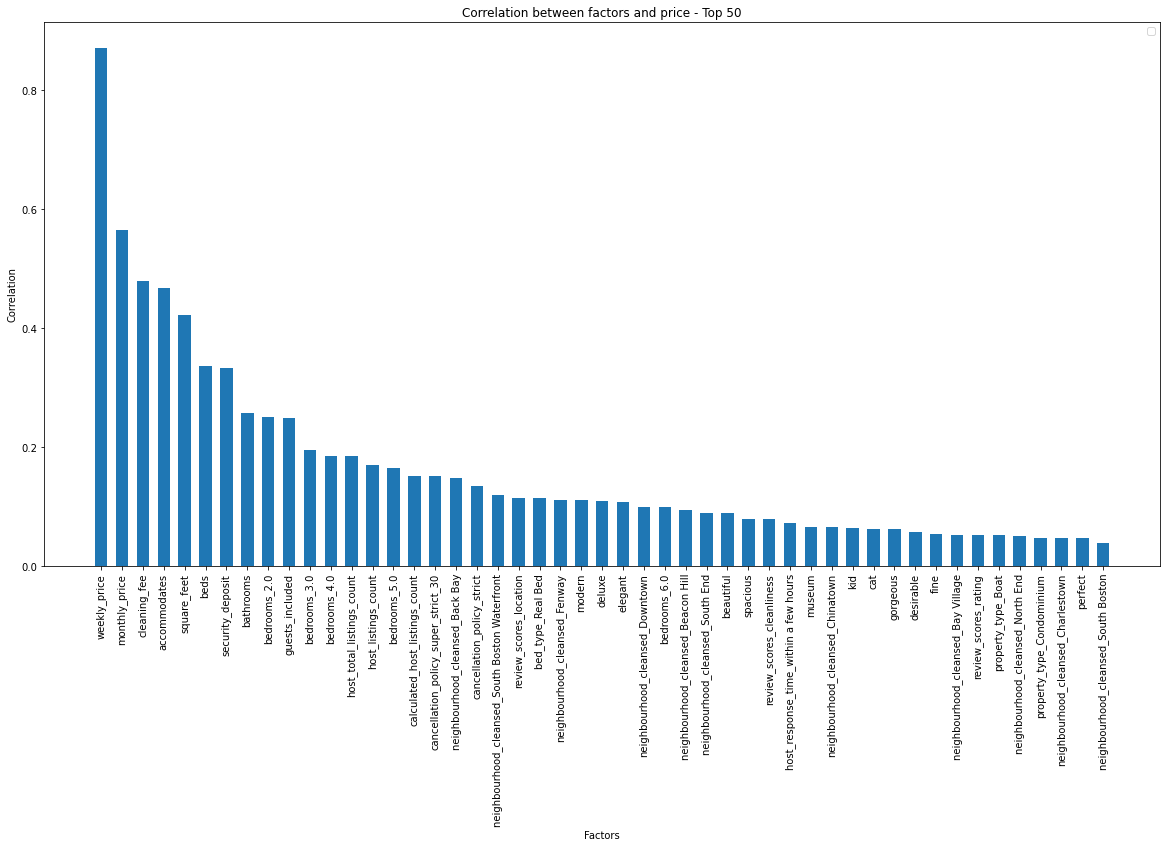

In [25]:
plt.figure(figsize=(20,10))

X = most_infl_s[:50].keys().tolist()
X_axis = np.arange(49)
plt.bar(X_axis, most_infl_s[1:50], 0.6)

plt.xticks(X_axis[:50], X[:49], rotation=90)
plt.xlabel("Factors")
plt.ylabel("Correlation")
plt.title("Correlation between factors and price - Top 50")
plt.legend()
plt.show()

No handles with labels found to put in legend.


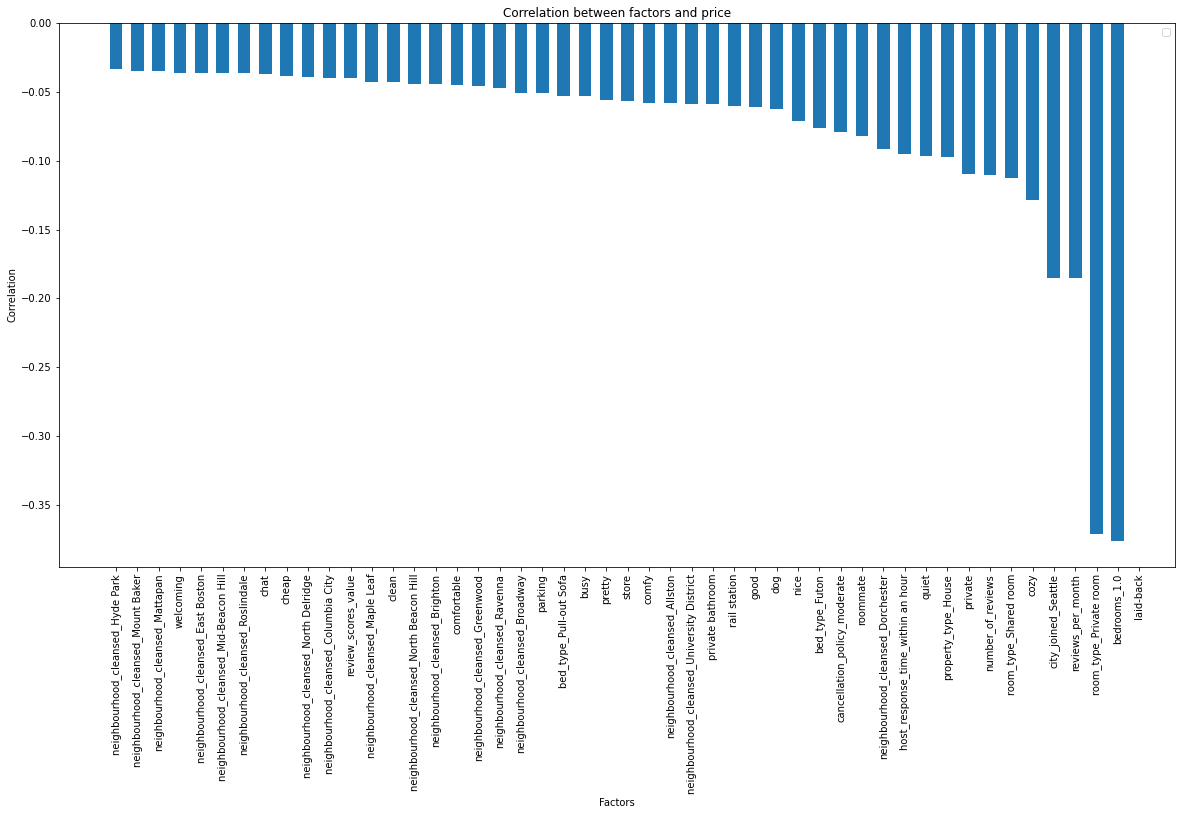

In [26]:
plt.figure(figsize=(20,10))

X = most_infl_s[-50:].keys().tolist()
X_axis = np.arange(49)
plt.bar(X_axis, most_infl_s[-49:], 0.6)

plt.xticks(X_axis, X[-49:], rotation=90)
plt.xlabel("Factors")
plt.ylabel("Correlation")
plt.title("Correlation between factors and price")
plt.legend()
plt.show()

# Question 2
Find the best and worst listed deals

Deal with NA values

In [27]:
#Check if there are the missing values
listings_q2.isnull().mean().sort_values(ascending=False)[:20]

square_feet                                   0.979333
monthly_price                                 0.675132
weekly_price                                  0.608132
security_deposit                              0.566662
cleaning_fee                                  0.288667
review_scores_accuracy                        0.200054
review_scores_checkin                         0.199649
review_scores_value                           0.199514
review_scores_location                        0.199514
review_scores_cleanliness                     0.198703
review_scores_communication                   0.198433
review_scores_rating                          0.197217
reviews_per_month                             0.186816
bathrooms                                     0.004052
beds                                          0.001351
host_total_listings_count                     0.000270
host_listings_count                           0.000270
neighbourhood_cleansed_Industrial District    0.000000
neighbourh

In [28]:
#Drop square feet from the table as it is not present in 98% of the rows and there are other indicators like accommodates which serve a similar role
listings_q2 = listings_q2.drop(['square_feet'], axis=1)


In [29]:
#Fill listed columns with 0s as NA values probably indicate that service is not present
na_zero_cols = ['monthly_price', 'weekly_price', 'security_deposit', 'cleaning_fee', 'reviews_per_month', 'bathrooms', 'beds', 'host_listings_count', 'host_total_listings_count']
listings_q2[na_zero_cols] = listings_q2[na_zero_cols].fillna(0)

#Fill rest of values with the column mean
listings_q2.fillna(listings_q2.mean(), inplace=True)


In [30]:
listings_q2

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,beds,price,weekly_price,monthly_price,security_deposit,...,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0,bedrooms_7.0,city_joined_Seattle
0,12147973,1.0,1.0,4,1.5,3.0,250.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,3075044,1.0,1.0,2,1.0,1.0,65.0,400.0,0.0,95.0,...,0,0,1,0,0,0,0,0,0,0
2,6976,1.0,1.0,2,1.0,1.0,65.0,395.0,1350.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,1436513,1.0,1.0,4,1.0,2.0,75.0,0.0,0.0,100.0,...,0,0,1,0,0,0,0,0,0,0
4,7651065,1.0,1.0,2,1.5,2.0,79.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,354.0,354.0,6,2.0,3.0,359.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3814,8902327,1.0,1.0,4,1.0,2.0,79.0,0.0,0.0,500.0,...,0,0,1,0,0,0,0,0,0,1
3815,10267360,1.0,1.0,2,1.0,1.0,93.0,450.0,0.0,250.0,...,0,0,1,0,0,0,0,0,0,1
3816,9604740,1.0,1.0,2,1.0,1.0,99.0,0.0,0.0,300.0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Split into explanatory and response variables
X = listings_q2.drop('price', axis=1)
y = listings_q2['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print('The test score is: ', '{:.3f}'.format(test_score))
print('The train score is: ', '{:.3f}'.format(train_score))

c:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


The test score is:  0.605
The train score is:  0.459


In [35]:
rmse_test = mean_squared_error(y_test,y_test_preds,squared=False)
rmse_train = mean_squared_error(y_train,y_train_preds,squared=False)
print('The rmse_test is: ', '{:.3f}'.format(rmse_test))
print('The rmse_train is: ', '{:.3f}'.format(rmse_train))

The rmse_test is:  67.548
The rmse_train is:  93.997


In [33]:
X_test['pred_price'] = lm_model.predict(X_test)
X_train['pred_price'] = lm_model.predict(X_train)

In [34]:
X_test

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,...,neighbourhood_cleansed_Yesler Terrace,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0,bedrooms_7.0,city_joined_Seattle,pred_price
781,8155580,37.0,37.0,1,1.0,1.0,275.0,880.0,350.0,35.0,...,0,1,0,0,0,0,0,0,1,47.783213
3197,6317722,15.0,15.0,4,1.0,2.0,0.0,0.0,400.0,125.0,...,0,0,1,0,0,0,0,0,0,212.330960
782,6705584,34.0,34.0,4,1.0,2.0,680.0,1895.0,150.0,60.0,...,0,1,0,0,0,0,0,0,1,129.047465
1429,1476298,5.0,5.0,2,1.0,1.0,1100.0,3590.0,0.0,30.0,...,0,0,0,0,0,0,0,0,1,108.874521
554,8014683,1.0,1.0,2,1.0,1.0,1600.0,3800.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,265.596450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2227959,2.0,2.0,2,1.0,1.0,415.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,47.393041
1049,11771810,1.0,1.0,2,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,181.861835
626,13624476,1.0,1.0,1,1.0,2.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,168.002269
121,7843837,1.0,1.0,4,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,89.803849


# Question 3
Find if there are differences in words which might reflect the difference in price